In [4]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# 2. Load Dataset
data = pd.read_csv("airpollution.csv")

# 3. Descriptive analysis
# Head of the dataset
print(data.head())

# Structure of the dataset
print(data.info())

# Dimensions of the dataset
print(data.shape)

# 4. Localization measures (Summary statistics)
print(data.describe())

# 5. Dispersion measures (Standard deviation for numeric columns)
print(data.select_dtypes(include=np.number).std())

# 6. Select only numeric columns for PCA and K-means (ignoring non-numeric columns like city names)
numeric_data = data.select_dtypes(include=np.number)

# Check if the data now only contains numeric columns
print(numeric_data.head())

# 7. Correlation matrix for numeric columns
cor_data = numeric_data.corr()
print(cor_data)

# 8. Eigenvalues and Eigenvectors (for PCA)
eigenvalues, eigenvectors = np.linalg.eig(cor_data)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

# 9. Perform PCA
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

       city  so2  temp  manuf  pop  wind  precip  days
0   Phoenix   10  70.3    213  582   6.0    7.05    36
1  Little R   13  61.0     91  132   8.2   48.52   100
2  San Fran   12  56.7    453  716   8.7   20.66    67
3    Denver   17  51.9    454  515   9.0   12.95    86
4  Hartford   56  49.1    412  158   9.0   43.37   127
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    41 non-null     object 
 1   so2     41 non-null     int64  
 2   temp    41 non-null     float64
 3   manuf   41 non-null     int64  
 4   pop     41 non-null     int64  
 5   wind    41 non-null     float64
 6   precip  41 non-null     float64
 7   days    41 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 2.7+ KB
None
(41, 8)
              so2       temp        manuf          pop       wind     precip  \
count   41.000000  41.000000    41.000000  

In [6]:
# PCA with correlation matrix (standardized data)
pca = PCA()
pca.fit(scaled_data)

# Variance explained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Components (loadings)
print("Principal Components (Loadings):")
print(pca.components_)

Explained Variance Ratio: [0.38973138 0.21604784 0.19928186 0.12742733 0.04953981 0.0143268
 0.00364499]
Principal Components (Loadings):
[[ 4.89698817e-01 -3.15370690e-01  5.41168703e-01  4.87588112e-01
   2.49874928e-01  1.87312186e-04  2.60179073e-01]
 [ 8.45756306e-02 -8.86378850e-02 -2.25881089e-01 -2.82003804e-01
   5.54714865e-02  6.25879366e-01  6.77967410e-01]
 [ 1.43501956e-02  6.77136178e-01  2.67159129e-01  3.44837959e-01
  -3.11265456e-01  4.92036299e-01 -1.09578949e-01]
 [-4.04210075e-01  1.85227939e-01  2.62723671e-02  1.13403769e-01
   8.61901314e-01  1.83937185e-01 -1.09760698e-01]
 [ 7.30394180e-01  1.62465152e-01 -1.64101110e-01 -3.49104824e-01
   2.68254900e-01  1.60598783e-01 -4.39969776e-01]
 [ 1.83345726e-01  6.10661071e-01 -4.27335187e-02 -8.78632695e-02
   1.50053780e-01 -5.53573845e-01  5.04946685e-01]
 [-1.49529278e-01  2.36641125e-02  7.45180920e-01 -6.49125507e-01
  -1.57653766e-02  1.03153086e-02 -8.21739320e-03]]


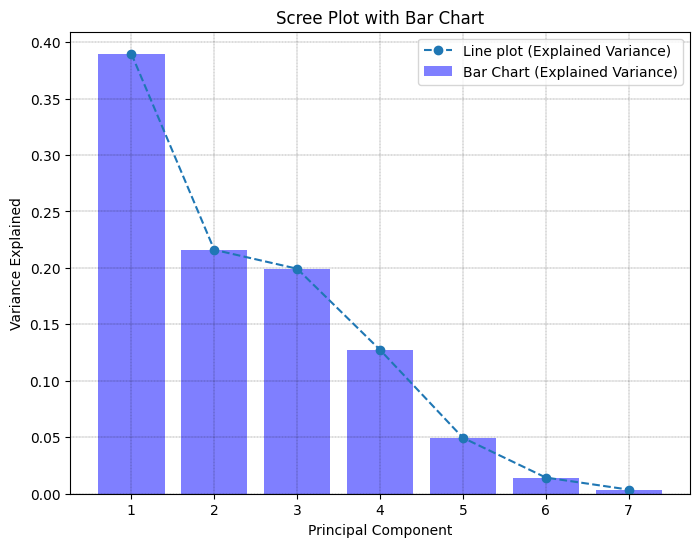

In [18]:
# 10. Scree plot (Variance explained) with bar chart
plt.figure(figsize=(8,6))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)


# Line plot for explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--', label='Line plot (Explained Variance)')

# Bar chart for explained variance ratio
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, color='blue', label='Bar Chart (Explained Variance)')

# Titles and labels
plt.title('Scree Plot with Bar Chart')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()

# Show the plot
plt.show()

In [8]:
# 11. Identifying variables that contribute more to the components
pc_scores = pca.transform(scaled_data)
correlation = np.corrcoef(scaled_data.T, pc_scores.T)[:numeric_data.shape[1], numeric_data.shape[1]:]
print("Correlation between original variables and principal components:")
print(correlation)

Correlation between original variables and principal components:
[[ 8.08836543e-01  1.04008594e-01  1.69488689e-02 -3.81757379e-01
   4.30113911e-01  5.80623217e-02 -2.38848977e-02]
 [-5.20898417e-01 -1.09004234e-01  7.99758597e-01  1.74939064e-01
   9.56723420e-02  1.93385471e-01  3.77996146e-03]
 [ 8.93849460e-01 -2.77781842e-01  3.15538908e-01  2.48130134e-02
  -9.66357237e-02 -1.35329433e-02  1.19030670e-01]
 [ 8.05350287e-01 -3.46799887e-01  4.07284577e-01  1.07104519e-01
  -2.05580555e-01 -2.78247305e-02 -1.03687362e-01]
 [ 4.12718933e-01  6.82171835e-02 -3.67632438e-01  8.14025199e-01
   1.57969720e-01  4.75193561e-02 -2.51826541e-03]
 [ 3.09383923e-04  7.69687821e-01  5.81139027e-01  1.73720009e-01
   9.45732765e-02 -1.75306964e-01  1.64770468e-03]
 [ 4.29738310e-01  8.33744148e-01 -1.29422573e-01 -1.03663810e-01
  -2.59089032e-01  1.59907610e-01 -1.31259643e-03]]


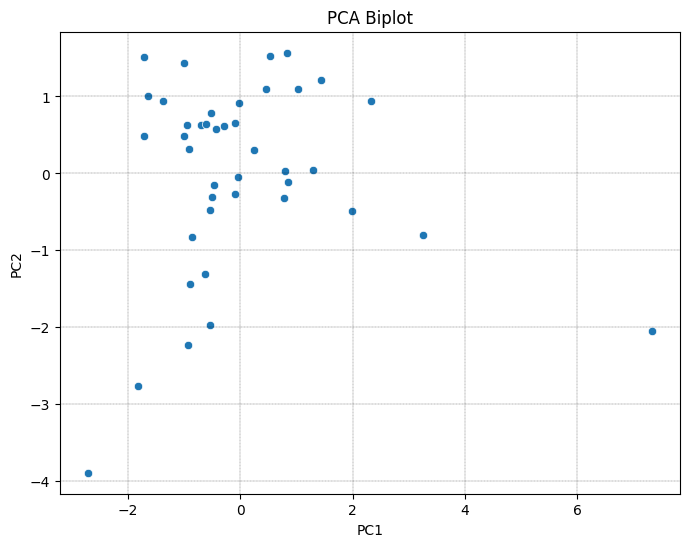

In [17]:
# Optional: Plot PCA biplot (scatter plot with component loadings)
plt.figure(figsize=(8,6))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
sns.scatterplot(x=pc_scores[:,0], y=pc_scores[:,1])
plt.title('PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

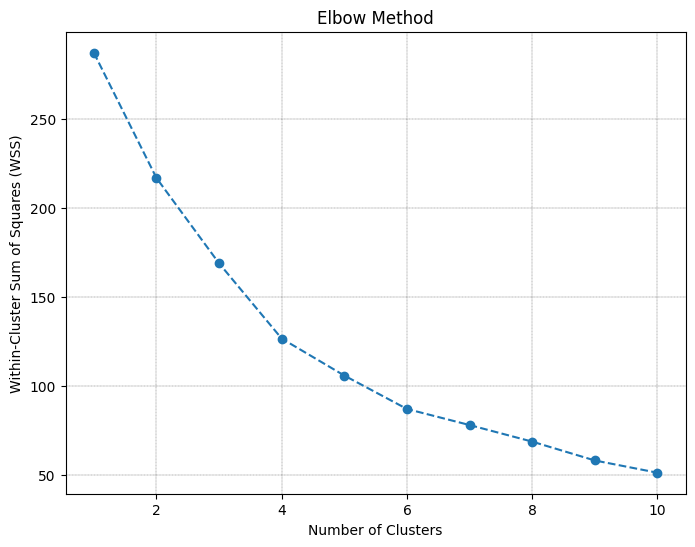

In [19]:
# 12. Elbow Method for Optimal Clusters
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=123)
    kmeans.fit(scaled_data)
    wss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8,6))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
plt.plot(range(1, 11), wss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.show()

In [11]:

# Find the optimal k (Elbow point)
optimal_k = np.diff(np.diff(wss)).argmin() + 2  # Add 2 because of the diff operation
print(f"Optimal number of clusters: {optimal_k}")

# 13. K-means Clustering
kmeans = KMeans(n_clusters=optimal_k, n_init=25, random_state=123)
kmeans.fit(scaled_data)

# Cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Assign clusters to the original dataset
data['Cluster'] = kmeans.labels_

Optimal number of clusters: 8
Cluster Centers:
[[ 0.9468157  -0.49214181  1.64385261  1.96307056  0.28778504 -0.11387392
   0.30928945]
 [-0.76231814  1.49342234 -0.22454468 -0.06859138 -0.10197788  1.15009042
  -0.25409246]
 [ 0.17617786 -0.19938491 -0.26525608 -0.29162184 -0.5082762   0.29955648
   0.4238756 ]
 [-0.56282934 -0.23300293 -0.34245651 -0.34240793 -0.43859132 -1.94644482
  -1.48589358]
 [-0.6244475  -0.84933324 -0.20320825 -0.25081316  1.3659604  -0.46262788
   0.05829121]
 [ 3.4485132  -0.72326568  5.17626667  4.8257974   0.67754797 -0.20030986
   0.30928945]
 [ 1.8669803  -0.80264155  0.18429123 -0.21901202  0.60668198  0.10472443
   1.08592891]
 [-0.86475834  2.03621325 -0.44936325 -0.04651998 -2.44055543 -2.5560117
  -2.97551354]]


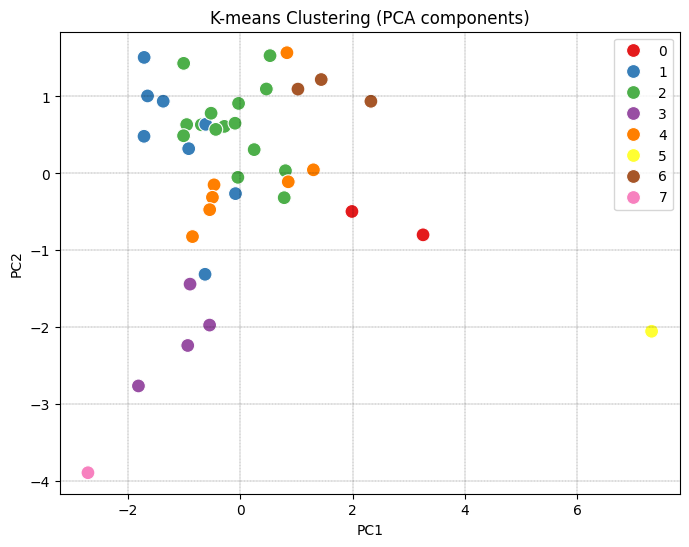

In [20]:
# Visualize the clustering results on the first two principal components
plt.figure(figsize=(8,6))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)

sns.scatterplot(x=pc_scores[:, 0], y=pc_scores[:, 1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-means Clustering (PCA components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [13]:

# 14. Cluster Sizes (Ensuring to only consider the numeric columns when calculating mean)
cluster_sizes = data['Cluster'].value_counts()
print("Cluster Sizes:")
print(cluster_sizes)

# 15. Cluster Means (Only considering numeric columns for aggregation)
cluster_means = data.groupby('Cluster').mean(numeric_only=True)  # Only numeric columns are aggregated
print("Cluster Means:")
print(cluster_means)

# 16. Cluster Descriptions (Summary statistics for each cluster)
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Description:")
    # Filtering out non-numeric columns and only summarizing numeric data for each cluster
    cluster_data = data[data['Cluster'] == cluster].select_dtypes(include=np.number)
    print(cluster_data.describe())

Cluster Sizes:
Cluster
2    15
1     8
4     7
3     4
6     3
0     2
7     1
5     1
Name: count, dtype: int64
Cluster Means:
                so2       temp        manuf          pop       wind  \
Cluster                                                               
0         52.000000  52.250000  1378.000000  1731.500000   9.850000   
1         12.375000  66.425000   338.125000   569.375000   9.300000   
2         34.133333  54.340000   315.466667   441.800000   8.726667   
3         17.000000  54.100000   272.500000   412.750000   8.825000   
4         15.571429  49.700000   350.000000   465.142857  11.371429   
5        110.000000  50.600000  3344.000000  3369.000000  10.400000   
6         73.333333  50.033333   565.666667   483.333333  10.300000   
7         10.000000  70.300000   213.000000   582.000000   6.000000   

            precip        days  
Cluster                         
0        35.445000  122.000000  
1        50.141250  107.250000  
2        40.252000  125.00000